In [1]:
import cv2
import face_recognition

In [2]:
img = cv2.imread('stuff_for_report/Pitt.jpg')
face_locations = face_recognition.face_locations(img, model="hog")

for current_face_loc in face_locations:
    top_p, right_p, bottom_p, left_p = current_face_loc
    
    cv2.rectangle(img, (left_p, top_p), (right_p, bottom_p), (0, 255, 0), 4)
    
    cv2.imwrite("Face_Detection.jpg", img)


# Image of HOG

In [11]:
from skimage import data, feature
import matplotlib.pyplot as plt
import cv2

In [4]:
img_for_hog = cv2.imread("stuff_for_report/Pitt.jpg")

hog_vector, hog_image = feature.hog(img_for_hog, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                   block_norm='L2', visualize=True)

# figure, axes = plt.subplot(1, 2, figsize=(432, 288), subplot_kw=dict(xticks=[], yticks=[]))
# axes[0].imshow(img_for_hog)
# axes[0].set_title("Original Image")

# plt.imshow()
# axes[1].set_title("HOG of Image")
cv2.imwrite("Hog.jpg",hog_image)


True

In [4]:
import dlib
import os
import cv2
import face_recognition
import numpy as np

[(312, 170) (633, 491)]


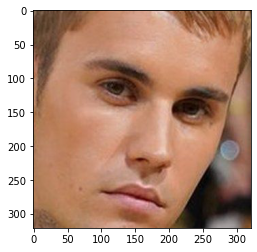

In [24]:
facerec = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")
detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

img_to_recognize = face_recognition.load_image_file('check_photos/bieber_rotate.jpg')

detected_faces = detector(img_to_recognize, 1) # определение области лица HOG
# face_locations = face_recognition.face_locations(img_to_recognize, model="hog")

# face_descriptor = facerec.compute_face_descriptor(img_to_recognize, detects_faces)
for k, rect in enumerate(detected_faces):
    print(rect)
    t, r, b, l = rect_to_bb(rect)
    landmarks = shape_predictor(img_to_recognize, rect) # определение ключевых точек лица 5/68
#     [[(p.x, p.y) for p in landmark.parts()] for landmark in landmarks]
    
    # отрисовка ключевых точек
#     for point in np.array(landmarks.parts()):
#         cv2.circle(img_to_recognize, (point.x, point.y), 5, (0, 0, 255), -1)
        
    face_chip = dlib.get_face_chip(img_to_recognize, landmarks) # выравнивание положения лица
    
#     plt.imshow(img_to_recognize)
#     cv2.imwrite("Landmarks_5.jpg", cv2.cvtColor(img_to_recognize, cv2.COLOR_RGB2BGR))
    
#     face_descriptor = np.array(facerec.compute_face_descriptor(face_chip, num_jitters=1))
#     print(x, y, w, h)
    plt.imshow(img_to_recognize[r:l, t:b])
#     cv2.imwrite("landmarks.jpg",cv2.cvtColor(img_to_recognize, cv2.COLOR_RGB2BGR))

In [25]:
img_to_recognize = face_recognition.load_image_file('Misha.jpg')
face_locations = face_recognition.face_locations(img_to_recognize, model="hog")

face_encodings = face_recognition.face_encodings(img_to_recognize, face_locations)

face_encodings

[array([-1.03007905e-01,  1.45052388e-01, -1.44996233e-02, -1.22355977e-02,
        -1.43660694e-01,  2.22267807e-02, -5.37767038e-02, -1.01384092e-02,
         1.15205593e-01, -4.81140427e-02,  1.71724156e-01, -5.78780379e-03,
        -2.19539568e-01,  9.36721042e-02,  1.94630288e-02,  1.79782838e-01,
        -1.58437788e-01, -1.39039576e-01, -1.44702196e-01, -1.68863639e-01,
        -3.25599685e-05,  1.91269163e-02, -8.24236199e-02,  1.02995358e-01,
        -2.54056901e-01, -1.98823884e-01, -5.56265637e-02, -7.43461177e-02,
         2.25357115e-02, -1.35240614e-01,  6.04121722e-02,  2.86593512e-02,
        -1.94575548e-01, -2.62488723e-02,  1.21694960e-01,  5.21975048e-02,
        -6.45790994e-02,  1.87471546e-02,  2.27638334e-01,  7.16093630e-02,
        -1.25996128e-01,  1.28909290e-01,  1.18907332e-01,  3.03330392e-01,
         1.38340056e-01,  1.07644334e-01,  3.63616198e-02, -5.46468198e-02,
         1.61180690e-01, -2.71515816e-01,  6.74429610e-02,  1.63319185e-01,
         1.3

# Нормализация Лица

In [8]:
from collections import OrderedDict

FACIAL_LANDMARKS_5_IDXS = OrderedDict([
    ("right_eye", (2, 3)),
    ("left_eye", (0, 1)),
    ("nose", (4))
])

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right()
    h = rect.bottom()

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

# dlib object -> np.array
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((shape.num_parts, 2), dtype=dtype)

    # loop over all facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, shape.num_parts):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

class FaceAligner:
    def __init__(self, predictor, desiredLeftEye=(0.32, 0.32),
        desiredFaceWidth=256, desiredFaceHeight=None):
        # store the facial landmark predictor, desired output left
        # eye position, and desired output face width + height
        self.predictor = predictor
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight
        # if the desired face height is None, set it to be the
        # desired face width (normal behavior)
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth
            
    # функция для нормализации лица
    # image - изображение в RGB 
    # gray - серое изображение
    # rect - область лица, выделенная HOG
    def align(self, image, gray, rect):
        # получение 5 ориентирова-landmarks
        shape = self.predictor(image, rect)
        # преобразование dlib object в np.array
        shape = shape_to_np(shape)
        
        # extract the left and right eye (x, y)-coordinates
        (lStart, lEnd) = FACIAL_LANDMARKS_5_IDXS["left_eye"]
        (rStart, rEnd) = FACIAL_LANDMARKS_5_IDXS["right_eye"]
        # извлечение точек левого глаза и правого (x, y)-coordinates
        leftEyePts = shape[lStart:lEnd + 1]
        rightEyePts = shape[rStart:rEnd + 1]
        
        # расчет центра масс для каждого глаза
        leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
        rightEyeCenter = rightEyePts.mean(axis=0).astype("int")
        # расчет угла между центроидами глаз
        dY = rightEyeCenter[1] - leftEyeCenter[1]
        dX = rightEyeCenter[0] - leftEyeCenter[0]
        angle = np.degrees(np.arctan2(dY, dX)) - 180
        print(angle)
        # вычисление х-коорд правого глаза основанной на x-коорд левого глаза
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]
        # определение масштаба результирующего изображения, взяв
        # отношение расстояния между глазами в текущем изображении
        # к отношению расстояния глаз в желаемом изображении
        dist = np.sqrt((dX ** 2) + (dY ** 2)) # Евклидово расстояние
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0]) # 
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist
        
        # вычисление центра между глазами (x, y)-coordinates (i.e., the median point)
        eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) / 2,
        (leftEyeCenter[1] + rightEyeCenter[1]) / 2)
        print("eyesCenter = " + str(eyesCenter))
        
        # получение матрицы для поворота и масштабирования лица
        M = cv2.getRotationMatrix2D(center=eyesCenter, angle=angle, scale=scale)
#         M = cv2.getRotationMatrix2D(center=eyesCenter, angle=0, scale=scale)
        
        # update the translation component of the matrix
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])
        
        # apply the affine transformation
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC)
        # return the aligned face
        return output


[(312, 170) (633, 491)]
312 170 633 491
-344.96956947656673
eyesCenter = (491.0, 304.5)
(150, 150, 3)


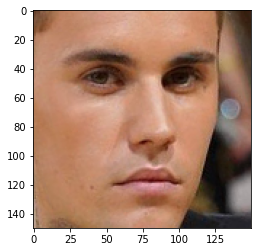

In [22]:
detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

fa = FaceAligner(shape_predictor, desiredFaceWidth=150, desiredFaceHeight=150)

img_to_recognize = face_recognition.load_image_file('check_photos/bieber_rotate.jpg')

gray_image = cv2.cvtColor(img_to_recognize, cv2.COLOR_BGR2GRAY)

detected_faces = detector(img_to_recognize, 1) # определение области лица HOG
for rect in detected_faces:
    print(rect)
    (x, y, w, h) = rect_to_bb(rect)
    print(x, y, w, h)

    faceAligned = fa.align(img_to_recognize, gray_image, rect)
    
    plt.imshow(faceAligned)
    print(faceAligned.shape)
#     print(desiredRightEyeX)

# второй способ нормализации


## Отображение треугольника на изображение для поворота

In [20]:
detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

img_to_recognize = face_recognition.load_image_file('check_photos/bieber_rotate.jpg')
detected_faces = detector(img_to_recognize, 1)
for rect in detected_faces:
#     (x, y, w, h) = rect_to_bb(rect)
#     print(x, y, w, h)
    shape = shape_predictor(img_to_recognize, rect)
    
    lands = shape_to_np(shape, dtype="int")
    print(lands)
    # поиск центров глаз
    center_left_eye = ((lands[2][0] + lands[3][0]) // 2, (lands[2][1] + lands[3][1]) // 2)
    cv2.circle(img_to_recognize, center_left_eye, 4, (0, 0, 255), -1)
    
    center_right_eye = ((lands[0][0] + lands[1][0]) // 2, (lands[0][1] + lands[1][1]) // 2)
    cv2.circle(img_to_recognize, center_right_eye, 4, (0, 0, 255), -1)
    
    # если левый ниже правого
    if center_left_eye[1] > center_right_eye[1]:
        A = (center_right_eye[0], center_left_eye[1])
        direction = -1 # поворот по часовой стрелке
    else:
        A = (center_left_eye[0], center_right_eye[1])
        # против часовой
        direction = 1 
        
    cv2.circle(img_to_recognize, A, 4, (0, 0, 255) , -1)
    
    cv2.line(img_to_recognize, center_right_eye, center_left_eye, (0,255,0), 2)
    cv2.line(img_to_recognize, center_left_eye, A, (0,255,0), 2)
    cv2.line(img_to_recognize, center_right_eye, A, (0,255,0), 2)
    
    
    delta_x = center_right_eye[0] - center_left_eye[0]
    delta_y = center_right_eye[1] - center_left_eye[1]
    angle=np.arctan(delta_y/delta_x)
    angle = (angle * 180) / np.pi
    
    
    # ширина и высота изображения
    h, w = img_to_recognize.shape[:2]
    # вычисление центра изображения
    center = (w // 2, h // 2)
    print(center)
    center = ((center_left_eye[0] + center_right_eye[0]) / 2,
                    (center_left_eye[1] + center_right_eye[1]) / 2)
    print(np.cos(np.arctan(delta_y/delta_x)))
    # определение матрицы M
    M = cv2.getRotationMatrix2D((center), (angle), 1)
    print(M)
    # применение аффинного преобразования
    rotated = cv2.warpAffine(img_to_recognize, M, (150, 150))
    
#     plt.imshow(rotated)
    
cv2.imwrite("photo_rotate.jpg", cv2.cvtColor(img_to_recognize, cv2.COLOR_RGB2BGR))

[[567 322]
 [523 316]
 [414 281]
 [460 299]
 [482 409]]
(488, 274)
0.9657882279462223
[[  0.96578823   0.25933202 -62.16862128]
 [ -0.25933202   0.96578823 137.74950846]]


True